# When Can You Save the Most on Eggs?

## Data

This post explores the the national and state shell egg prices with data from the [USDA National Agricultural Statistics Service website (USDA NASS)](https://quickstats.nass.usda.gov/). The data will be extracted from the USDA NASS API. The exploration will provide insights on egg price trends.

In [2]:
#import packages needed to extract data from the USDA NASS API
import requests
import json
import pandas as pd
from pandas.io.json import json_normalize

pd.set_option("display.max_columns", None) #display all columns in dataframe in output cells


api_key = "1E23F999-B7C0-3D89-B81C-04894F4F5FAD"
base = "http://quickstats.nass.usda.gov/api/api_GET/?"

We will extracct three data tables for analysis:
1. Number of total layers (egg laying chickens)
2. National egg prices
3. State egg prices

In [3]:
#1. total number of layers
##connect the api with specific parameters
total_layer = requests.get(
    url = base, 
    params = {
        "key": api_key,
        "source_desc": "SURVEY",
        "sector_desc": "ANIMALS & PRODUCTS",
        "group_desc": "POULTRY",
        "commodity_desc": "CHICKENS",
        "short_desc": "CHICKENS, LAYERS, TABLE - INVENTORY",
        "agg_level_desc": "NATIONAL",
        "State_name": "US TOTAL"
    }
                 
)

##check the key value in the returned result
for key in total_layer.json():
    print(key)



data


In [4]:
##convert to dataframe
df_total_layer = json_normalize(total_layer.json()['data'])

df_total_layer.head()

,CV (%),Value,agg_level_desc,asd_code,asd_desc,begin_code,class_desc,commodity_desc,congr_district_code,country_code,country_name,county_ansi,county_code,county_name,domain_desc,domaincat_desc,end_code,freq_desc,group_desc,load_time,location_desc,prodn_practice_desc,reference_period_desc,region_desc,sector_desc,short_desc,source_desc,state_alpha,state_ansi,state_fips_code,state_name,statisticcat_desc,unit_desc,util_practice_desc,watershed_code,watershed_desc,week_ending,year,zip_5
0,,"341,552,000",NATIONAL,,,01,"LAYERS, TABLE",CHICKENS,,9000,UNITED STATES,,,,TOTAL,NOT SPECIFIED,01,POINT IN TIME,POULTRY,2020-02-28 15:12:25,US TOTAL,ALL PRODUCTION PRACTICES,FIRST OF JAN,,ANIMALS & PRODUCTS,"CHICKENS, LAYERS, TABLE - INVENTORY",SURVEY,US,,99,US TOTAL,INVENTORY,HEAD,ALL UTILIZATION PRACTICES,00000000,,,2020,
1,,"336,457,000",NATIONAL,,,02,"LAYERS, TABLE",CHICKENS,,9000,UNITED STATES,,,,TOTAL,NOT SPECIFIED,02,POINT IN TIME,POULTRY,2020-02-28 15:12:25,US TOTAL,ALL PRODUCTION PRACTICES,FIRST OF FEB,,ANIMALS & PRODUCTS,"CHICKENS, LAYERS, TABLE - INVENTORY",SURVEY,US,,99,US TOTAL,INVENTORY,HEAD,ALL UTILIZATION PRACTICES,00000000,,,2020,
2,,"341,559,000",NATIONAL,,,01,"LAYERS, TABLE",CHICKENS,,9000,UNITED STATES,,,,TOTAL,NOT SPECIFIED,01,POINT IN TIME,POULTRY,2020-02-27 15:04:07,US TOTAL,ALL PRODUCTION PRACTICES,FIRST OF JAN,,ANIMALS & PRODUCTS,"CHICKENS, LAYERS, TABLE - INVENTORY",SURVEY,US,,99,US TOTAL,INVENTORY,HEAD,ALL UTILIZATION PRACTICES,00000000,,,2019,
3,,"339,522,000",NATIONAL,,,02,"LAYERS, TABLE",CHICKENS,,9000,UNITED STATES,,,,TOTAL,NOT SPECIFIED,02,POINT IN TIME,POULTRY,2020-02-27 15:04:07,US TOTAL,ALL PRODUCTION PRACTICES,FIRST OF FEB,,ANIMALS & PRODUCTS,"CHICKENS, LAYERS, TABLE - INVENTORY",SURVEY,US,,99,US TOTAL,INVENTORY,HEAD,ALL UTILIZATION PRACTICES,00000000,,,2019,
4,,"341,836,000",NATIONAL,,,03,"LAYERS, TABLE",CHICKENS,,9000,UNITED STATES,,,,TOTAL,NOT SPECIFIED,03,POINT IN TIME,POULTRY,2020-02-27 15:04:07,US TOTAL,ALL PRODUCTION PRACTICES,FIRST OF MAR,,ANIMALS & PRODUCTS,"CHICKENS, LAYERS, TABLE - INVENTORY",SURVEY,US,,99,US TOTAL,INVENTORY,HEAD,ALL UTILIZATION PRACTICES,00000000,,,2019,


We will keep year, begin_code (month), and Value columns.

In [5]:
##keep the wanted columns
df_total_layer = df_total_layer[["year", "begin_code", "Value"]]

##replace "," with ""
df_total_layer = df_total_layer.replace(",", "" ,regex=True)

##check data types
df_total_layer.dtypes

year           int64
begin_code    object
Value         object
dtype: object

In [6]:
##convert to appropriate data types
df_total_layer[["begin_code"]] = df_total_layer[["begin_code"]].astype(int)
df_total_layer[["Value"]] = df_total_layer[["Value"]].astype(float)

##rename columns
df_total_layer.columns = ['year', 'month', 'value']

##check data types again
df_total_layer.dtypes

year       int64
month      int64
value    float64
dtype: object

We will repeat the above processes to extract national and state egg prices.

In [7]:
#2. National egg prices
##connect the api with specific parameters
egg_price_national = requests.get(
    url = base, 
    params = {
        "key": api_key,
        "source_desc": "SURVEY",
        "sector_desc": "ANIMALS & PRODUCTS",
        "group_desc": "POULTRY",
        "commodity_desc": "EGGS",
        "short_desc": "EGGS, TABLE - PRICE RECEIVED, MEASURED IN $ / DOZEN",
        "agg_level_desc": "NATIONAL",
    }
                 
)

##convert to dataframe
df_egg_price_national = json_normalize(egg_price_national.json()['data'])

df_egg_price_national.head()

,CV (%),Value,agg_level_desc,asd_code,asd_desc,begin_code,class_desc,commodity_desc,congr_district_code,country_code,country_name,county_ansi,county_code,county_name,domain_desc,domaincat_desc,end_code,freq_desc,group_desc,load_time,location_desc,prodn_practice_desc,reference_period_desc,region_desc,sector_desc,short_desc,source_desc,state_alpha,state_ansi,state_fips_code,state_name,statisticcat_desc,unit_desc,util_practice_desc,watershed_code,watershed_desc,week_ending,year,zip_5
0,,0.453,NATIONAL,,,01,TABLE,EGGS,,9000,UNITED STATES,,,,TOTAL,NOT SPECIFIED,01,MONTHLY,POULTRY,2020-02-28 15:02:03,US TOTAL,ALL PRODUCTION PRACTICES,JAN,,ANIMALS & PRODUCTS,"EGGS, TABLE - PRICE RECEIVED, MEASURED IN $ / ...",SURVEY,US,,99,US TOTAL,PRICE RECEIVED,$ / DOZEN,ALL UTILIZATION PRACTICES,00000000,,,2020,
1,,0.797,NATIONAL,,,01,TABLE,EGGS,,9000,UNITED STATES,,,,TOTAL,NOT SPECIFIED,01,MONTHLY,POULTRY,2020-02-28 15:02:03,US TOTAL,ALL PRODUCTION PRACTICES,JAN,,ANIMALS & PRODUCTS,"EGGS, TABLE - PRICE RECEIVED, MEASURED IN $ / ...",SURVEY,US,,99,US TOTAL,PRICE RECEIVED,$ / DOZEN,ALL UTILIZATION PRACTICES,00000000,,,2019,
2,,0.7,NATIONAL,,,02,TABLE,EGGS,,9000,UNITED STATES,,,,TOTAL,NOT SPECIFIED,02,MONTHLY,POULTRY,2019-04-30 15:06:07,US TOTAL,ALL PRODUCTION PRACTICES,FEB,,ANIMALS & PRODUCTS,"EGGS, TABLE - PRICE RECEIVED, MEASURED IN $ / ...",SURVEY,US,,99,US TOTAL,PRICE RECEIVED,$ / DOZEN,ALL UTILIZATION PRACTICES,00000000,,,2019,
3,,0.639,NATIONAL,,,03,TABLE,EGGS,,9000,UNITED STATES,,,,TOTAL,NOT SPECIFIED,03,MONTHLY,POULTRY,2019-05-31 15:07:33,US TOTAL,ALL PRODUCTION PRACTICES,MAR,,ANIMALS & PRODUCTS,"EGGS, TABLE - PRICE RECEIVED, MEASURED IN $ / ...",SURVEY,US,,99,US TOTAL,PRICE RECEIVED,$ / DOZEN,ALL UTILIZATION PRACTICES,00000000,,,2019,
4,,0.373,NATIONAL,,,04,TABLE,EGGS,,9000,UNITED STATES,,,,TOTAL,NOT SPECIFIED,04,MONTHLY,POULTRY,2019-06-27 15:25:14,US TOTAL,ALL PRODUCTION PRACTICES,APR,,ANIMALS & PRODUCTS,"EGGS, TABLE - PRICE RECEIVED, MEASURED IN $ / ...",SURVEY,US,,99,US TOTAL,PRICE RECEIVED,$ / DOZEN,ALL UTILIZATION PRACTICES,00000000,,,2019,


In [8]:
##keep the wanted columns
df_egg_price_national = df_egg_price_national[["year", "begin_code", "Value"]]

##check data types
df_egg_price_national.dtypes

year           int64
begin_code    object
Value         object
dtype: object

In [9]:
##convert to appropriate data types
df_egg_price_national[["begin_code"]] = df_egg_price_national[["begin_code"]].astype(int)
df_egg_price_national[["Value"]] = df_egg_price_national[["Value"]].astype(float)

##rename columns
df_egg_price_national.columns = ['year', 'month', 'value']

##check data types again
df_egg_price_national.dtypes

year       int64
month      int64
value    float64
dtype: object

In [83]:
#3. State egg prices
##connect the api with specific parameters
egg_price_state = requests.get(
    url = base, 
    params = {
        "key": api_key,
        "source_desc": "SURVEY",
        "sector_desc": "ANIMALS & PRODUCTS",
        "group_desc": "POULTRY",
        "commodity_desc": "EGGS",
        "short_desc": "EGGS, TABLE - PRICE RECEIVED, MEASURED IN $ / DOZEN",
        "agg_level_desc": "STATE",
    }
                 
)

##convert to dataframe
df_egg_price_state = json_normalize(egg_price_state.json()['data'])

df_egg_price_state.head()

,CV (%),Value,agg_level_desc,asd_code,asd_desc,begin_code,class_desc,commodity_desc,congr_district_code,country_code,country_name,county_ansi,county_code,county_name,domain_desc,domaincat_desc,end_code,freq_desc,group_desc,load_time,location_desc,prodn_practice_desc,reference_period_desc,region_desc,sector_desc,short_desc,source_desc,state_alpha,state_ansi,state_fips_code,state_name,statisticcat_desc,unit_desc,util_practice_desc,watershed_code,watershed_desc,week_ending,year,zip_5
0,,0.95,STATE,,,01,TABLE,EGGS,,9000,UNITED STATES,,,,TOTAL,NOT SPECIFIED,01,MONTHLY,POULTRY,2012-01-01 00:00:00,ALABAMA,ALL PRODUCTION PRACTICES,JAN,,ANIMALS & PRODUCTS,"EGGS, TABLE - PRICE RECEIVED, MEASURED IN $ / ...",SURVEY,AL,01,01,ALABAMA,PRICE RECEIVED,$ / DOZEN,ALL UTILIZATION PRACTICES,00000000,,,2009,
1,,0.64,STATE,,,02,TABLE,EGGS,,9000,UNITED STATES,,,,TOTAL,NOT SPECIFIED,02,MONTHLY,POULTRY,2012-01-01 00:00:00,ALABAMA,ALL PRODUCTION PRACTICES,FEB,,ANIMALS & PRODUCTS,"EGGS, TABLE - PRICE RECEIVED, MEASURED IN $ / ...",SURVEY,AL,01,01,ALABAMA,PRICE RECEIVED,$ / DOZEN,ALL UTILIZATION PRACTICES,00000000,,,2009,
2,,0.65,STATE,,,03,TABLE,EGGS,,9000,UNITED STATES,,,,TOTAL,NOT SPECIFIED,03,MONTHLY,POULTRY,2012-01-01 00:00:00,ALABAMA,ALL PRODUCTION PRACTICES,MAR,,ANIMALS & PRODUCTS,"EGGS, TABLE - PRICE RECEIVED, MEASURED IN $ / ...",SURVEY,AL,01,01,ALABAMA,PRICE RECEIVED,$ / DOZEN,ALL UTILIZATION PRACTICES,00000000,,,2009,
3,,0.76,STATE,,,04,TABLE,EGGS,,9000,UNITED STATES,,,,TOTAL,NOT SPECIFIED,04,MONTHLY,POULTRY,2012-01-01 00:00:00,ALABAMA,ALL PRODUCTION PRACTICES,APR,,ANIMALS & PRODUCTS,"EGGS, TABLE - PRICE RECEIVED, MEASURED IN $ / ...",SURVEY,AL,01,01,ALABAMA,PRICE RECEIVED,$ / DOZEN,ALL UTILIZATION PRACTICES,00000000,,,2009,
4,,0.39,STATE,,,05,TABLE,EGGS,,9000,UNITED STATES,,,,TOTAL,NOT SPECIFIED,05,MONTHLY,POULTRY,2012-01-01 00:00:00,ALABAMA,ALL PRODUCTION PRACTICES,MAY,,ANIMALS & PRODUCTS,"EGGS, TABLE - PRICE RECEIVED, MEASURED IN $ / ...",SURVEY,AL,01,01,ALABAMA,PRICE RECEIVED,$ / DOZEN,ALL UTILIZATION PRACTICES,00000000,,,2009,


In [84]:
##keep the wanted columns
df_egg_price_state = df_egg_price_state[["year", "state_alpha", "begin_code", "Value"]]

##check data types
df_egg_price_state.dtypes

year            int64
state_alpha    object
begin_code     object
Value          object
dtype: object

In [85]:
##convert to appropriate data types
df_egg_price_state[["begin_code"]] = df_egg_price_state[["begin_code"]].astype(int)
df_egg_price_state[["Value"]] = df_egg_price_state[["Value"]].astype(float)

##rename columns
df_egg_price_state.columns = ['year', 'state', 'month', 'value']

##check data types again
df_egg_price_state.dtypes

year       int64
state     object
month      int64
value    float64
dtype: object

## Exploratory Analysis

### When is Egg Price the Lowest?
We draw a line graph with year and month as the x-axis and the price per dozen on the y-axis.

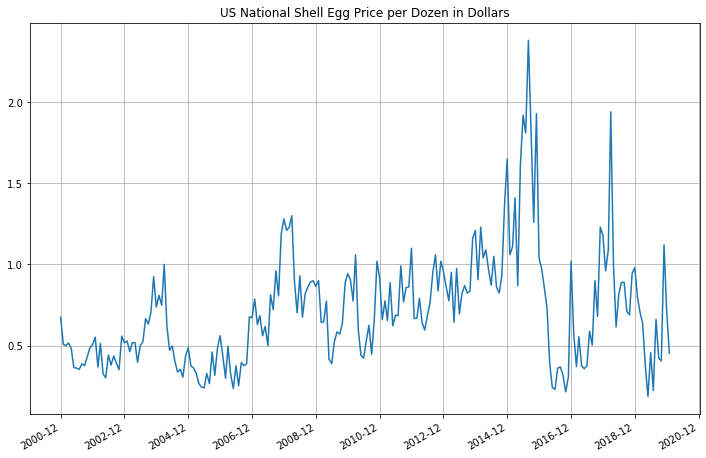

In [44]:
#import visualization libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#create a date column combining year and month
df_egg_price_national["date"] = df_egg_price_national["year"].map(str) + " " + df_egg_price_national["month"].map(str)
df_egg_price_national["date"] = pd.to_datetime(df_egg_price_national["date"], format = "%Y %m")

#sort data by date
df_egg_price_national.sort_values("date", inplace = True)

#initiate plot
fig, ax = plt.subplots()

#plot date on x-axis, price on y-axis
ax.plot(df_egg_price_national["date"], df_egg_price_national["value"], "-")

#set x-axis ticks frequency: every 2 years
ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 24))

#formulate x-axis labels so they don't overlap
fig.autofmt_xdate()

#add gridlines
plt.grid()

#add title
plt.title("US National Shell Egg Price per Dozen in Dollars")

#resize
fig = plt.gcf()
fig.set_size_inches(12, 8)


There are seasonal fluctuations in the price. The [chicken flus in 2015](https://www.cdc.gov/flu/avianflu/north-american-lineage.htm) and [the lack of supply along with other factors at the beginning of 2018](https://www.organicauthority.com/buzz-news/u-s-egg-prices-on-the-rise-in-2018) caused big swings in the market during those times. 
Let's take a look at the average monthly price without 2015 and 2018. 

In [14]:
#drop 2015 and 2018 then group by month to obtain monthly average
df = df_egg_price_national[~df_egg_price_national["year"].isin(["2015", "2018"])].groupby("month").mean()
df

,year,value
month,,
1,2009.833333,0.716667
2,2009.235294,0.670000
3,2009.235294,0.731176
4,2009.235294,0.574412
5,2009.235294,0.479176
6,2009.235294,0.509765
7,2009.235294,0.545706
8,2009.235294,0.614588
9,2009.235294,0.620588


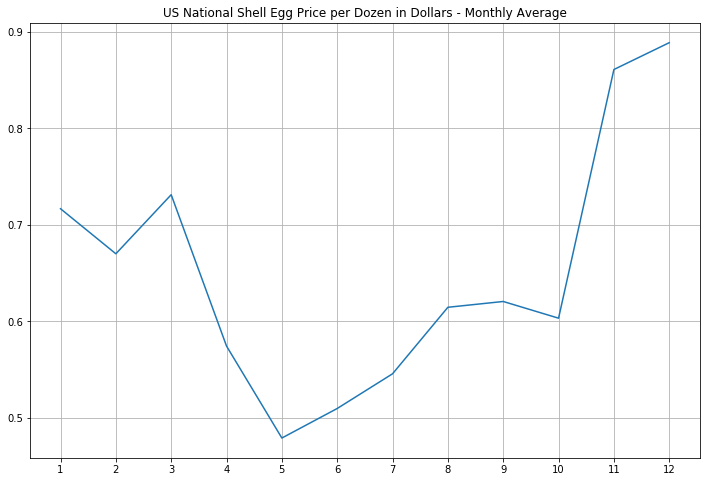

In [45]:
#initiate plot
fig, ax = plt.subplots()

#month is now the index, so there is no need to specify it
ax.plot(df["value"], "-")

#set x-ticks to display for all 12 months
plt.xticks(np.arange(1, 13))

#add gridlines
plt.grid()

#add title
plt.title("US National Shell Egg Price per Dozen in Dollars - Monthly Average")

#resize
fig = plt.gcf()
fig.set_size_inches(12, 8)

In the past 19 years, egg costs were relatively stable during the beginning of the year, then dropped starting in the spring and summer, followed by increase starting in fall and reached peaks during winter holidays.

### What about in California?
California is a big driver in the egg market because of its big size of production and consumption, as well as [regulation on raising Egg-laying hens](https://www.cdfa.ca.gov/ahfss/Prop12.html). We will explore the prices in different states and see how the egg market moves in California.

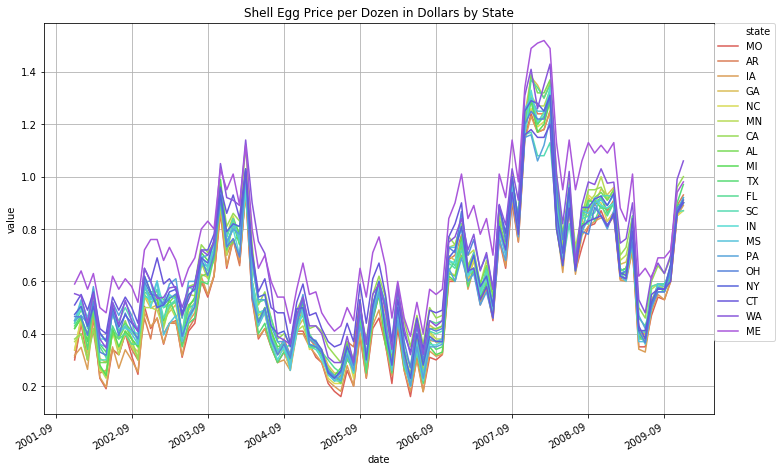

In [124]:
import seaborn as sns

#create a date column combining year and month
df_egg_price_state["date"] = df_egg_price_state["year"].map(str) + " " + df_egg_price_state["month"].map(str)
df_egg_price_state["date"] = pd.to_datetime(df_egg_price_state["date"], format = "%Y %m")

#sort data by date
df_egg_price_state.sort_values(["date", "value"], inplace = True)

#initiate plot
fig, ax = plt.subplots()

#create palette
unique = df_egg_price_state["state"].unique()
palette = dict(zip(unique, sns.color_palette("hls", 25)))

#create plots with multiple lines
sns.lineplot(data = df_egg_price_state, x = "date", y = "value", hue = "state", palette = palette)

#replace legend
plt.legend(bbox_to_anchor = (1, 1), loc = 2, borderaxespad = 0.0)

#set x-axis ticks frequency: every 2 years
ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 12))

#formulate x-axis labels so they don't overlap
fig.autofmt_xdate()

#add gridlines
plt.grid()

#add title
plt.title("Shell Egg Price per Dozen in Dollars by State")

#resize
fig = plt.gcf()
fig.set_size_inches(12, 8)

Egg cost is the highest in Maine in most times from 2002 to 2010. California seems to be in the middle of the range. Let's compare California's average as well as the highest and lowest States with the national average during these years.

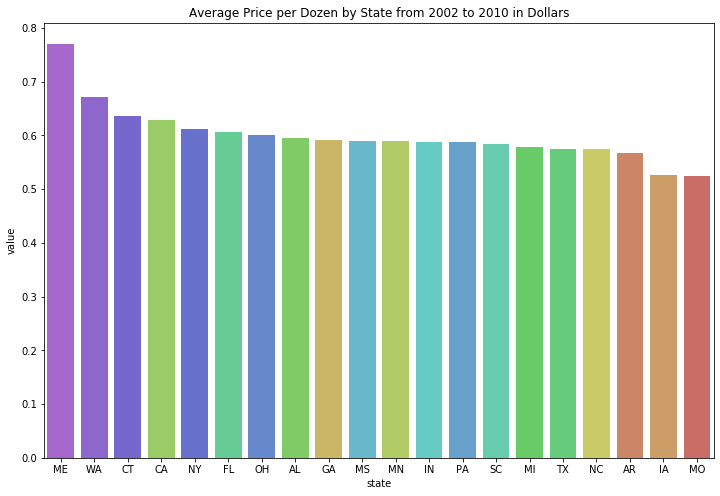

In [135]:
df = df_egg_price_state.groupby("state").mean().sort_values("value", ascending = False)
df.reset_index(level = 0, inplace = True)

sns.barplot(x = "state", y = "value", data = df, palette = palette)

plt.title("Average Price per Dozen by State from 2002 to 2010 in Dollars")

#resize
fig = plt.gcf()
fig.set_size_inches(12, 8)

Maine has the highest average price and Missouri has the lowest average price. 

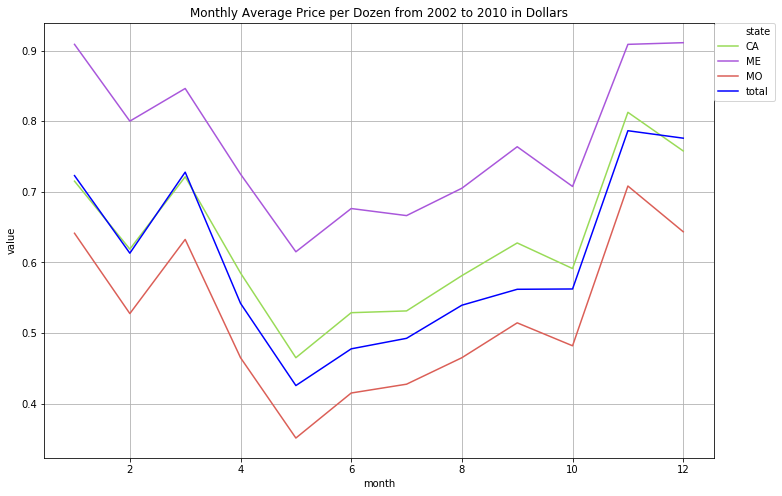

In [137]:
df1 = df_egg_price_state[df_egg_price_state["state"].isin(["ME", "MO", "CA"])].groupby(["state","month"]).mean()
df1.reset_index(level = 0, inplace = True)

df2 = df_egg_price_national[(df_egg_price_national["year"]>=2002) & (df_egg_price_national["year"]<=2010)].groupby("month").mean()

df2["state"] = "total"

df = df1[["state","value"]].append(df2[["state","value"]])
df.reset_index(level = 0, inplace = True)

#initiate plot
fig, ax = plt.subplots()

#create palette
palette.update({"total":"B"})

#create plots with multiple lines
sns.lineplot(data = df, x = "month", y = "value", hue = "state", palette = palette)

#replace legend
plt.legend(bbox_to_anchor = (1, 1), loc = 2, borderaxespad = 0.0)

#add gridlines
plt.grid()

#add title
plt.title("Monthly Average Price per Dozen from 2002 to 2010 in Dollars")

#resize
fig = plt.gcf()
fig.set_size_inches(12, 8)


California egg costs are slightly higher than the national average from 2002-2010, but still follows similar trend as the national level. from 2002 to 2009, consumers in California experienced the lowest egg cost during the summer months, and the highest cost during the winter holiday seasons as demand increased. Though there are no data avaialble after 2009 for the states, as the trend followed closely the national trend, consumers might have experienced similar price changes during since 2010.

## What Influences Egg Price?
As mentioned at the beginning, many factors could affect the egg market. One biggest and obvious factor is egg supply. We could explore the relationship between the supply and the egg market with the number of chicken layers. 

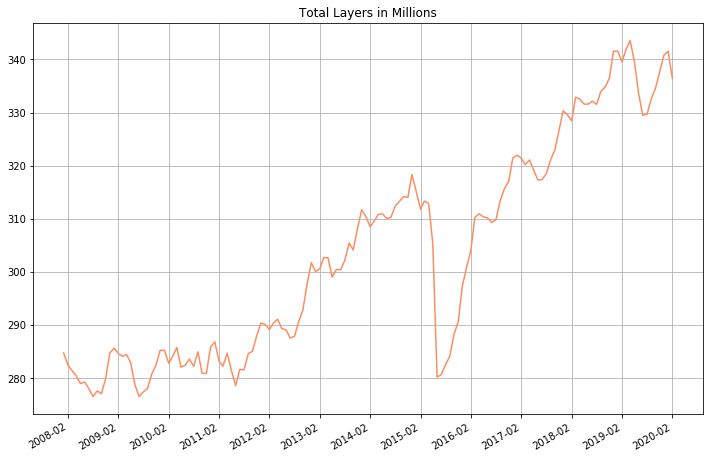

In [141]:
#create a date column combining year and month
df_total_layer["date"] = df_total_layer["year"].map(str) + " " + df_total_layer["month"].map(str)
df_total_layer["date"] = pd.to_datetime(df_total_layer["date"], format = "%Y %m")

df_total_layer["value2"] = df_total_layer["value"]/1000000

#sort data by date
df_total_layer.sort_values("date", inplace = True)

#initiate plot
fig, ax = plt.subplots()

#plot date on x-axis, price on y-axis
ax.plot(df_total_layer["date"], df_total_layer["value2"], "-",  color = "#FC8D62")

#set x-axis ticks frequency: every 2 years
ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 12))

#formulate x-axis labels so they don't overlap
fig.autofmt_xdate()

#add gridlines
plt.grid()

#add title
plt.title("Total Layers in Millions")

#resize
fig = plt.gcf()
fig.set_size_inches(12, 8)

We can see that due to the flu in 2015, the number of layers dropped significantly. Despite the big drop, the trend of layer number is increasing. 

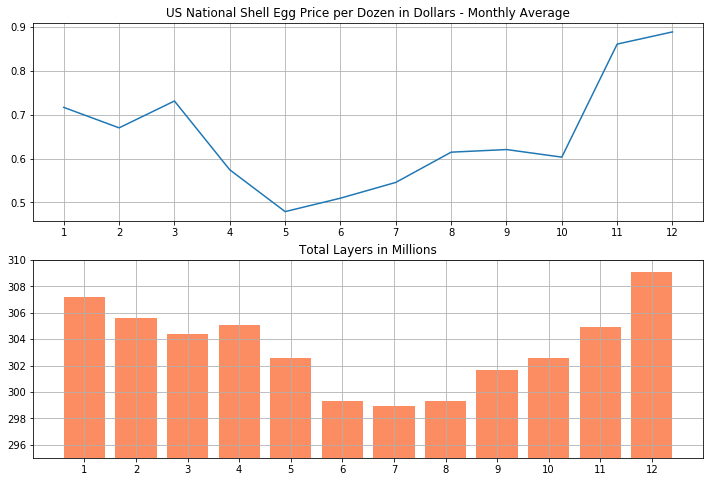

In [158]:
df_total_layer_mean = df_total_layer.groupby("month").mean()
df_total_layer_mean.reset_index(level = 0, inplace = True)

df_national_mean = df_egg_price_national[~df_egg_price_national["year"].isin(["2015", "2018"])].groupby("month").mean()
df_national_mean.reset_index(level = 0, inplace = True)

plt.subplot(2, 1, 1)

plt.plot(df_national_mean["month"], df_national_mean["value"], "-")

#set x-ticks to display for all 12 months
plt.xticks(np.arange(1, 13))

#add gridlines
plt.grid()

#add title
plt.title("US National Shell Egg Price per Dozen in Dollars - Monthly Average")


plt.subplot(2, 1, 2)

#month is now the index, so there is no need to specify it
plt.bar(x = df_total_layer_mean["month"], height = df_total_layer_mean["value2"], color = "#FC8D62")

#set x-ticks to display for all 12 months
plt.xticks(np.arange(1, 13))

#adjust y-axis range
plt.ylim(295, 310)

#add gridlines
plt.grid()

#add title
plt.title("Total Layers in Millions")

#resize
fig = plt.gcf()
fig.set_size_inches(12, 8)



The number of egg layers display a similar trend as the egg prices. There are more egg layers at the beginning and the end of the year compared to the summer months. 

## Conclusion
In all, egg prices are generally higher at the beginning and the end of each year, and drop around spring. Consumers get the cheapest eggs every year during summer, and should expect to pay more as fall approaches. During the winter holidays, consumers spend the most in egg purchase compared to other times. So if you are having a party during the summer time, feel free to get as many eggs as you'd like. They are the cheapest in May, June, and July. But if you are having a Thanksgiving or Christmas party, you might need to spend more than 50% than a summer party on your egg dishes!